In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Sk
from tqdm import tqdm

from WLM import WLChain

import os, sys

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [2]:
q = (np.logspace(-4,0,65))

L = 10000
b = L/100*2 # Kuhn length

N_backbone = 10000
a_backbone = N_backbone/100
lambda_backbone = L/N_backbone

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [02:46<00:00,  1.67s/it]


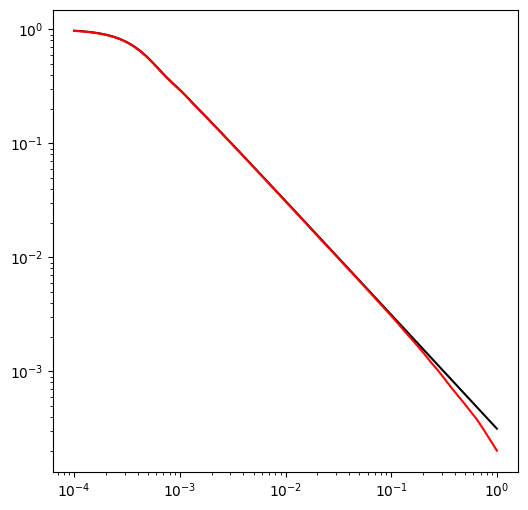

In [3]:
S_q_rod = Sk.S_rod(q,L)

chain_rod = WLChain(N_backbone,N_backbone*1e8,lambda_backbone)
chain_rod.d_exc = chain_rod.a*0.1
chain_rod.apply_SA = 0

n_sample = 100
def sample_S_q_rod(n_sample,chain_func,p):
    S_q = np.zeros_like(q)
    for i in tqdm(range(n_sample)):
        chain_func.chain()
        chain_func.scatter_direct(q,n_merge=1,p_sub=p)
        S_q += chain_func.S_q
        
    return(S_q)

S_q_rod_sample = sample_S_q_rod(n_sample,chain_rod,0.025)
S_q_rod_MC = S_q_rod_sample/n_sample

plt.close('all')
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
ax.plot(q,S_q_rod,'-k')
ax.plot(q,S_q_rod_MC,'-r')
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()